In [5]:
import tensorflow as tf
import numpy as np

In [6]:
import pandas as pd
import random
import matplotlib.pyplot as plt

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

# Создаю обучающую классификатор выборку

In [4]:
def create_dataset(parabola=0, ne_parabola=0, samples=100000):
    
    x_x_train = [random.uniform(-1,1)*1000 for i in range(samples)]
    x_y_train = list(np.array(x_x_train)**2)
    y_train = list(np.ones(samples, dtype=int))
    
    x_x_train_u = [random.uniform(-1,1)*1000 for i in range(samples)]
    x_y_train_u = [random.uniform(-1,1)*1000000 for i in range(samples)]
    y_train_u = list(np.zeros(samples, dtype=int))
    
    x_train = []
    for x,y in zip(x_x_train,x_y_train):
        x_train.append([x,y])
    
    x_train_u = []
    for x,y in zip(x_x_train_u,x_y_train_u):
        x_train_u.append([x,y])
        
    x_train = np.reshape(np.array(x_train),(samples,2))
    x_train_u = np.reshape(np.array(x_train_u),(samples,2))
    
    X_train = np.concatenate([x_train, x_train_u], axis=0)
    Y_train = np.concatenate([y_train, y_train_u], axis=0)
    
    X_train, Y_train = shuffle(X_train, Y_train, random_state=44)
    
    if (ne_parabola and parabola):
        return x_train, y_train, x_train_u, y_train_u, X_train, Y_train
    
    elif parabola:
        return x_train, y_train
    
    elif ne_parabola:
        return x_train_u, y_train_u
    
    return X_train, Y_train

In [5]:
x_train, y_train, x_train_u, y_train_u, X_train, Y_train = create_dataset (parabola = True, ne_parabola = True)

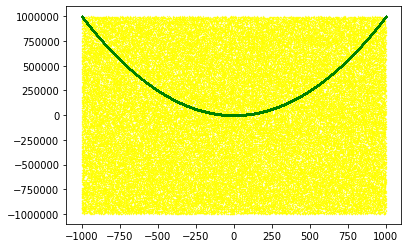

In [6]:
plt.scatter([x[0] for x in x_train_u],[x[1] for x in x_train_u], s= 0.1, c ='yellow')
plt.scatter([x[0] for x in x_train],[x[1] for x in x_train], s= 0.1, c ='green')

# Создаю модели

### Дискриминатор

In [78]:
n_inputs=2
classificator = tf.keras.models.Sequential()
classificator.add(tf.keras.layers.Dense(25, kernel_initializer='he_uniform', input_dim=n_inputs))
classificator.add(tf.keras.layers.LeakyReLU(0.2))
classificator.add(tf.keras.layers.Dense(1, activation='sigmoid'))
classificator.compile(loss='binary_crossentropy', optimizer=tf.train.AdamOptimizer(learning_rate=0.01), metrics = ['accuracy'])

In [13]:
classificator.fit(X_train, Y_train, epochs=1)

Instructions for updating:
Use tf.cast instead.
200000/200000 [==============================] - 43s 217us/sample - loss: 3.9893 - acc: 0.7498


### Генератор

In [7]:
latent_dim=5
n_outputs=2
generator = tf.keras.models.Sequential()
generator.add(tf.keras.layers.Dense(25, kernel_initializer='he_uniform', input_dim=latent_dim))
classificator.add(tf.keras.layers.LeakyReLU(0.2))
generator.add(tf.keras.layers.Dense(n_outputs, activation='tanh'))

Instructions for updating:
Colocations handled automatically by placer.


NameError: name 'classificator' is not defined

In [4]:
latent_dim=5
n_outputs=2
generator = tf.keras.models.Sequential()
generator.add(tf.keras.layers.Dense(25, kernel_initializer='he_uniform', input_dim=latent_dim))
classificator.add(tf.keras.layers.LeakyReLU(0.2))
generator.add(tf.keras.layers.Dense(n_outputs, activation='tanh'))

NameError: name 'tf' is not defined

### Пушка

In [16]:
def define_gan(generator, discriminator):
    # make weights in the discriminator not trainable
    discriminator.trainable = False
    # connect them
    model = tf.keras.models.Sequential()
    # add generator
    model.add(generator)
    # add the discriminator
    model.add(discriminator)
    # compile model
    model.compile(loss='binary_crossentropy', optimizer=tf.train.AdamOptimizer(learning_rate=0.01))
    return model

In [77]:
def train_gan(generator,discriminator, n_epochs, gan=0):
    
    if gan==0:
        gan = define_gan(generator,classificator)
        
    for x in range(n_epochs):
        
        x_gan = [[random.uniform(-1,1)*1000,random.uniform(-1,1)*1000,random.uniform(-1,1)*1000,random.uniform(-1,1)*1000,random.uniform(-1,1)*1000] for i in range(50000)]      
        activation_model = tf.keras.Model(inputs = gan.layers[0].input, outputs = gan.layers[0].output)
        preds = activation_model.predict(np.reshape(x_gan, (50000,5)))
        
        preds_hist.append(preds)
        
        t_x, t_y = create_dataset(samples=25000)
        t_x = np.concatenate([t_x,preds], axis = 0)
        t_y = np.concatenate([t_y,np.zeros(50000,dtype=int)], axis = 0)
        
        t_x, t_y = shuffle(t_x, t_y, random_state=44)
        
        classificator.trainable = True
        classificator.fit(t_x, t_y, epochs = 1)
        gan = define_gan(generator,classificator)
        x_gan = [[random.uniform(-1,1)*1000,random.uniform(-1,1)*1000,random.uniform(-1,1)*1000,random.uniform(-1,1)*1000,random.uniform(-1,1)*1000] for i in range(100000)]      
        gan.fit(np.reshape(x_gan, (100000,5)),epochs=1)
        
    return gan
    

In [80]:
gan = define_gan(generator= generator, discriminator = classificator)

In [81]:
preds_hist=[]

In [82]:
gan = train_gan( n_epochs = 100, gan = gan, generator= generator, discriminator = classificator)

100000/100000 [==============================] - 34s 336us/sample - loss: 11.0568


100000/100000 [==============================] - 34s 339us/sample - loss: 12.9305


In [83]:
gan = train_gan( n_epochs = 100, gan = gan, generator= generator, discriminator = classificator)

100000/100000 [==============================] - 36s 360us/sample - loss: 2.0236 - acc: 0.8730


KeyboardInterrupt: 

In [170]:
gan.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_25 (Sequential)   (None, 2)                 202       
_________________________________________________________________
sequential_21 (Sequential)   (None, 1)                 101       
Total params: 303
Trainable params: 202
Non-trainable params: 101
_________________________________________________________________


In [89]:
gan.save('keklol.h5')

### Проверяю как работает

In [84]:
x_gan = [[random.uniform(-1,1)*1000,random.uniform(-1,1)*1000,random.uniform(-1,1)*1000,random.uniform(-1,1)*1000,random.uniform(-1,1)*1000] for i in range(100000)]      

In [85]:
activation_model = tf.keras.Model(inputs = gan.layers[0].input, outputs = gan.layers[0].output)

In [86]:
preds = activation_model.predict(np.reshape(x_gan, (100000,5)))

In [41]:
preds_hist

[array([[ 565.31744 ,  351.75882 ],
        [  60.804115,  270.28833 ],
        [ 600.8097  ,  652.39166 ],
        ...,
        [ 644.0222  ,  164.29056 ],
        [ 876.01544 ,  939.1258  ],
        [1127.012   ,  709.4283  ]], dtype=float32)]

In [87]:
classificator.predict(preds)

array([[0.0000000e+00],
       [0.0000000e+00],
       [3.8266182e-05],
       ...,
       [0.0000000e+00],
       [0.0000000e+00],
       [3.8266182e-05]], dtype=float32)

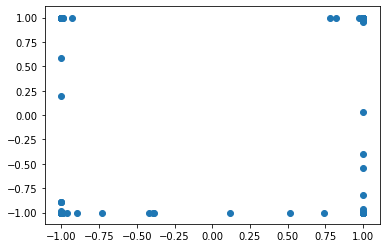

In [88]:
plt.scatter([x[0] for x in preds],[x[1] for x in preds])